In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Text(0.5, 0.98, 'some_faces')

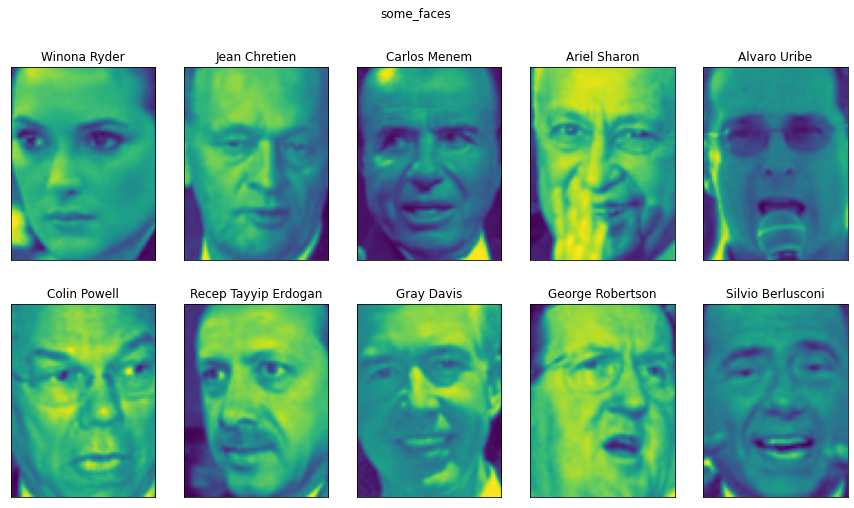

In [2]:
# Importamos el dataset de las fotos
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
plt.suptitle("some_faces")

In [17]:
type(fetch_lfw_people)

function

In [3]:
print('(# de fotos, # pixeles a lo largo, #pixeles a lo ancho):')
print(people.images.shape)
print('Número de personas a las que pertenecen las fotos:')
print(len(people.target_names))

(# de fotos, # pixeles a lo largo, #pixeles a lo ancho):
(3023, 87, 65)
Número de personas a las que pertenecen las fotos:
62


In [7]:
# Contamos cuantas veces aparece cada target (cada persona)
counts = np.bincount(people.target)
# Imprimimos el nombre de cada persona y de fotos que tiene en el dataset
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), '|',end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 | Alvaro Uribe               35 | Amelie Mauresmo            21 | 
Andre Agassi               36 | Angelina Jolie             20 | Ariel Sharon               77 | 
Arnold Schwarzenegger      42 | Atal Bihari Vajpayee       24 | Bill Clinton               29 | 
Carlos Menem               21 | Colin Powell              236 | David Beckham              31 | 
Donald Rumsfeld           121 | George Robertson           22 | George W Bush             530 | 
Gerhard Schroeder         109 | Gloria Macapagal Arroyo    44 | Gray Davis                 26 | 
Guillermo Coria            30 | Hamid Karzai               22 | Hans Blix                  39 | 
Hugo Chavez                71 | Igor Ivanov                20 | Jack Straw                 28 | 
Jacques Chirac             52 | Jean Chretien              55 | Jennifer Aniston           21 | 
Jennifer Capriati          42 | Jennifer Lopez             21 | Jeremy Greenstock          24 | 
Jiang Zemin                20 

In [8]:
mask = np.zeros(people.target.shape, dtype=np.bool_)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# Escalamos los valores de la escala de grises para estar entre 0 y 1 
# en lugar de estar entre 0 y 255 para tener una mehor estabilidad numérica
X_people = X_people / 255.


In [9]:
# Dividimos entre datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

C:\Users\1046244\miniconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\1046244\miniconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


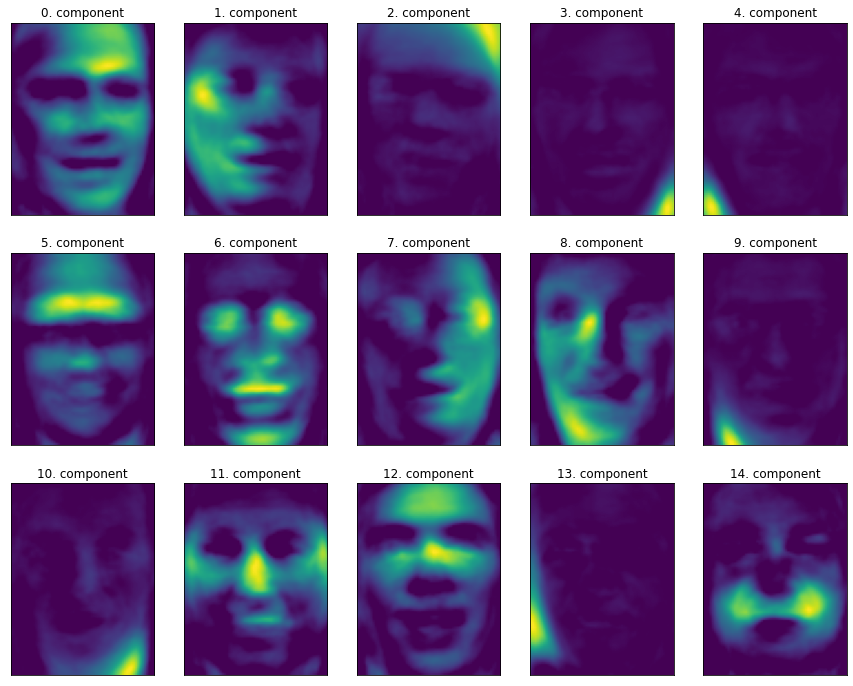

In [39]:
# Imoportamos NMF
from sklearn.decomposition import NMF
# Decimos cuantas componentes queremos y damos la semilla aleatoria
nmf = NMF(n_components=20, random_state=0)
# Decimos con respecto a que conjunto hacer el ajuste
nmf.fit(X_train)
# Transformamos los datos de entrenamiento y prueba
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("%d. component" % i)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
# Dividimos entre datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# Hacemos un KNeighborClassifier tomando en cuenta 1 vecino
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.2189922480620155

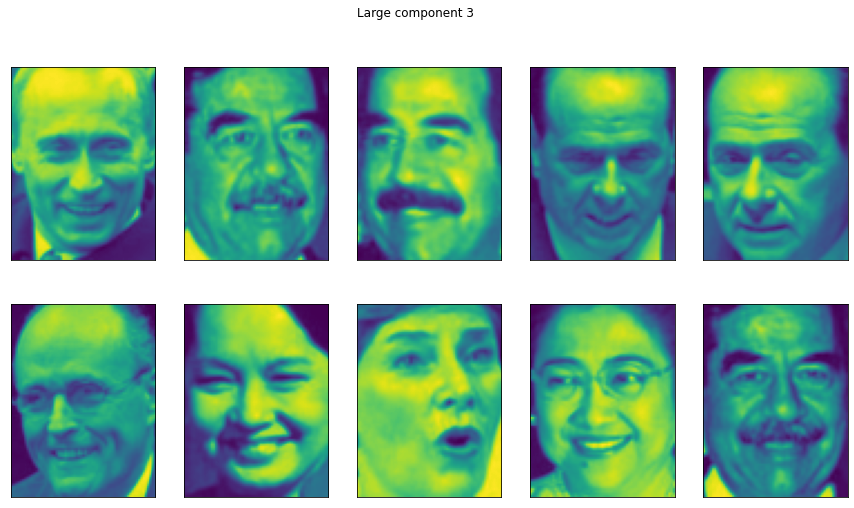

In [38]:
compn = 5
# Imprimimos las fotos más cercanas a la tercera componente
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [14]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier

Text(0.5, 0.98, 'some_faces')

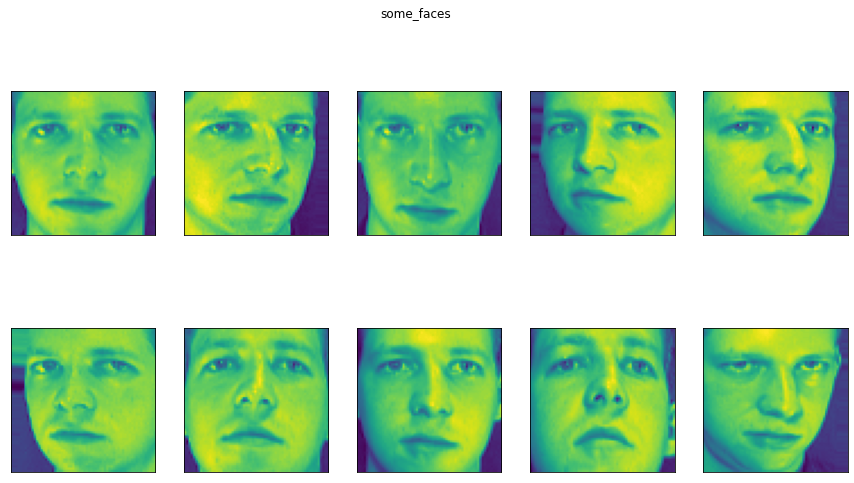

In [53]:
faces = fetch_olivetti_faces()
image_shape = faces.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(faces.target, faces.images, axes.ravel()):
    ax.imshow(image)
    #ax.set_title(people.target_names[target])
plt.suptitle("some_faces")


In [21]:
dir(faces)

['DESCR', 'data', 'images', 'target']

In [33]:
print(np.shape(faces.images))
print(np.shape(faces.data))

(400, 64, 64)
(400, 4096)


In [54]:
X = faces.data
#X = people.images
y = faces.target


In [55]:
from sklearn.decomposition import PCA
# Mantenemos las primeras 2 componentes principales de los datos
pca = PCA(n_components=20)
# Ajustamos PCA al dataset de cancer ya escalado
pca.fit(X)
# Transformamos los datos en las primeras dos componentes principales
X_pca = pca.transform(X)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
# Dividimos entre datos de entrenamiento y de prueba
F_train, F_test, a_train, a_test = train_test_split(X, y, random_state=0)

F_train_pca =pca.transform(F_train)
# Hacemos un KNeighborClassifier tomando en cuenta 1 vecino
knn = KNeighborsClassifier()
knn.fit(F_train, a_train)
knn.score(F_test, a_test)

0.76

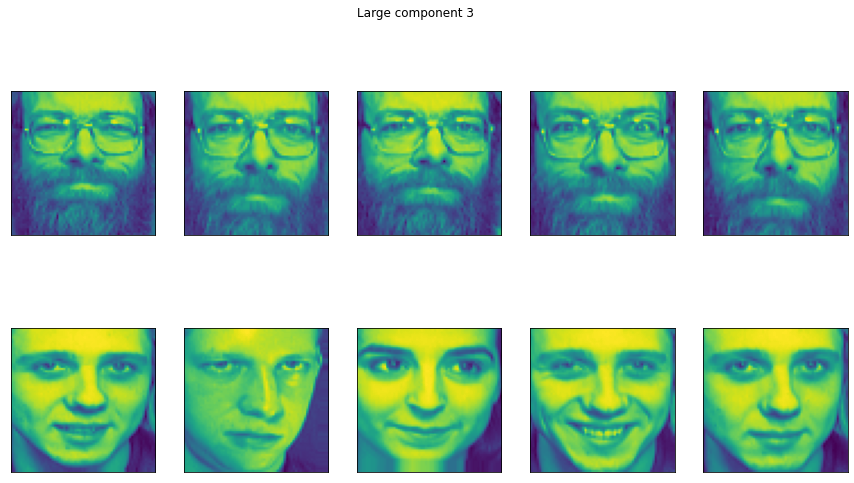

In [64]:
compn = 2
# Imprimimos las fotos más cercanas a la tercera componente
inds = np.argsort(F_train_pca[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(F_train[ind].reshape(image_shape))

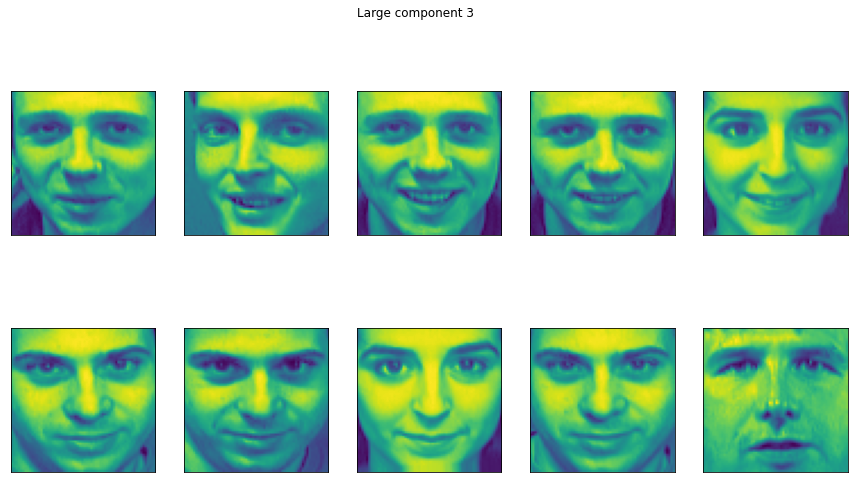

In [65]:
compn = 5
# Imprimimos las fotos más cercanas a la tercera componente
inds = np.argsort(F_train_pca[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(F_train[ind].reshape(image_shape))